# Import libraries

In [1]:
import os
import warnings

import pandas as pd
from IPython.display import Image, display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from matplotlib.pyplot import MultipleLocator
warnings.filterwarnings('ignore')

In [35]:
from utils import data_utils, plot_utils, model_utils

In [3]:
# Enable autoreload
%load_ext autoreload
%autoreload 2

# Dataset

In [4]:
df_maths = pd.read_csv('./data/Maths.csv')
df_port = pd.read_csv('./data/Portuguese.csv')
display(df_maths)
display(df_port)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
X_trainm, X_testm, X_trainp, X_testp = data_utils.generate_dataset(df_maths, df_port)

# Data Distribution

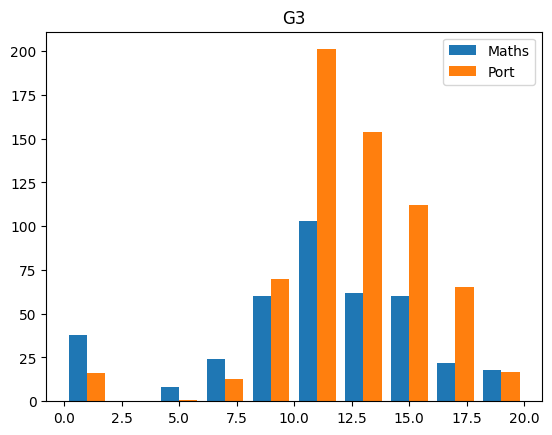

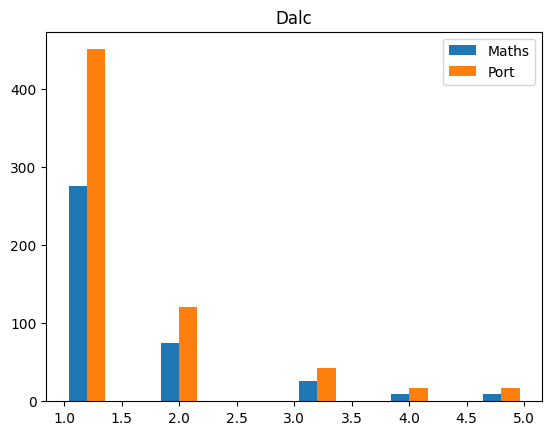

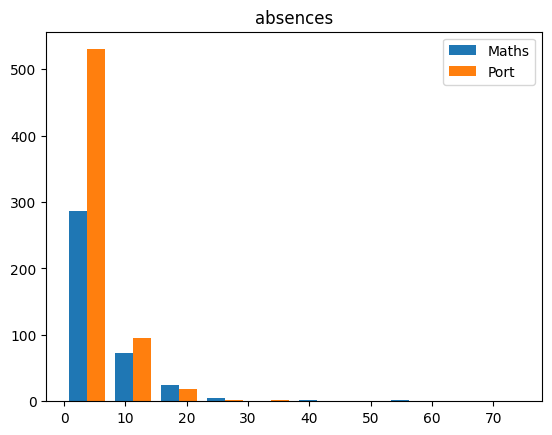

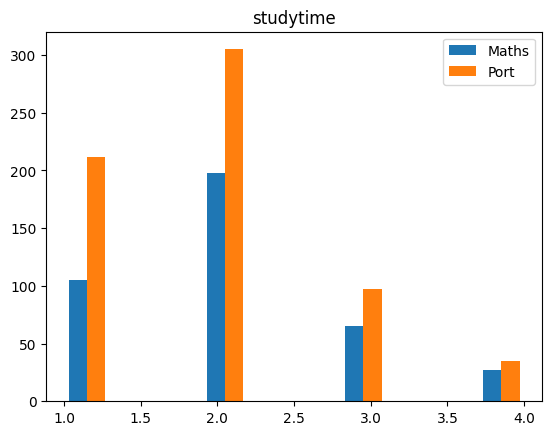

In [9]:
if not os.path.exists('./plot'):
    os.mkdir('./plot')

hist_list = ['G3', 'Dalc', 'absences', 'studytime']
for hist_i in hist_list:
    plot_utils.plot_hist(df_maths, df_port, hist_i, f'./plot/hist_{hist_i}.png', show=True)

# Heatmap

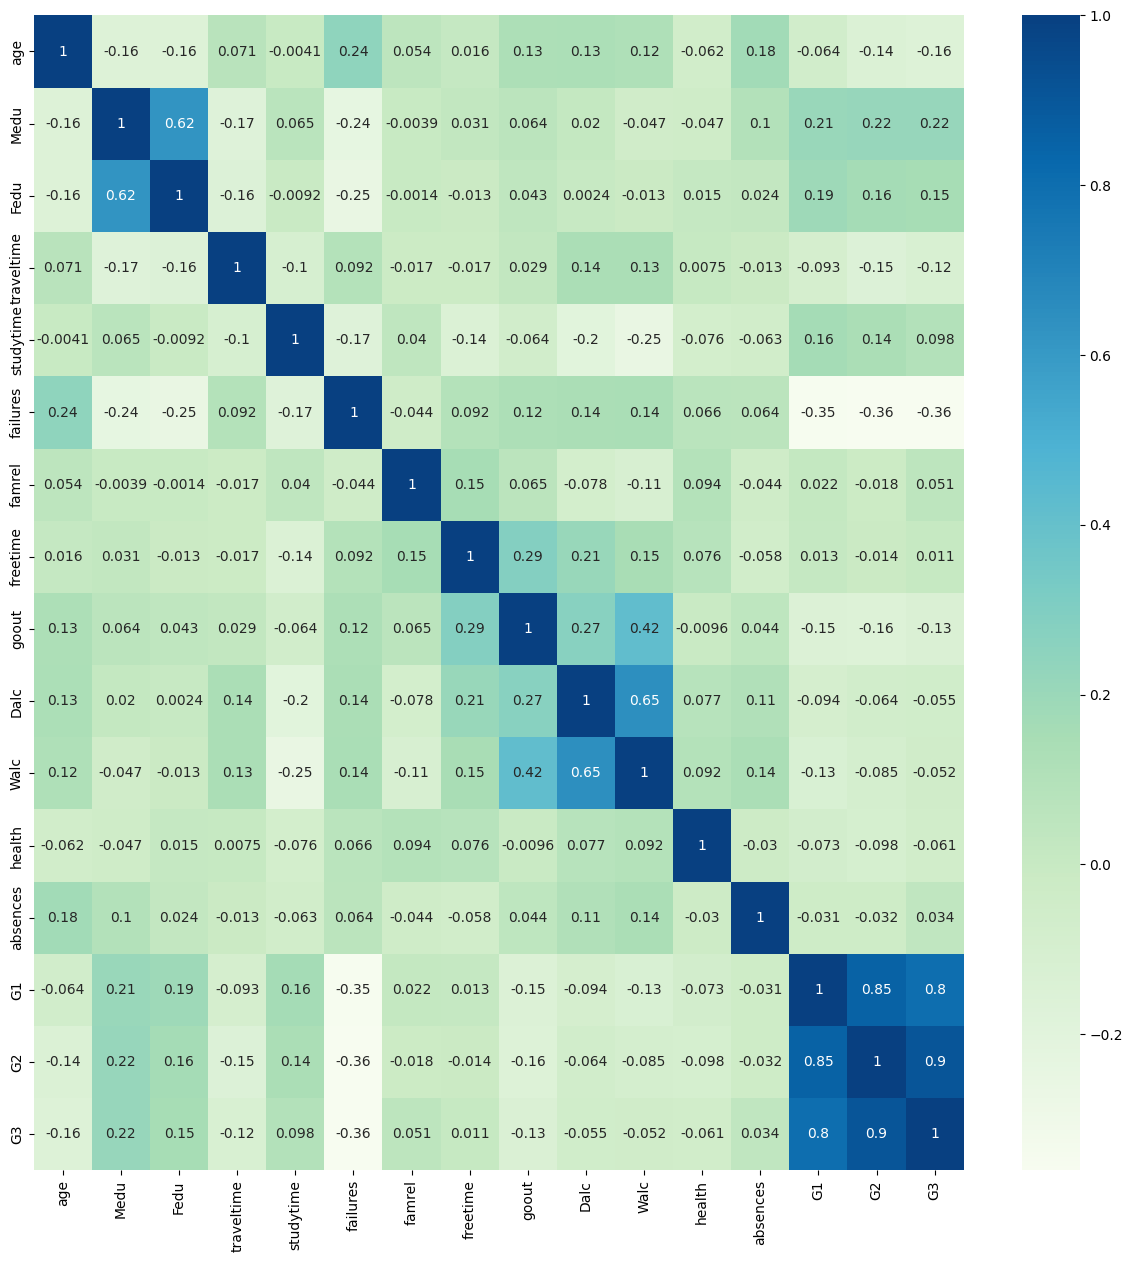

In [12]:
plot_utils.plot_heatmap(df_maths, save_path='./plot/maths_heatmap.png', show=True)

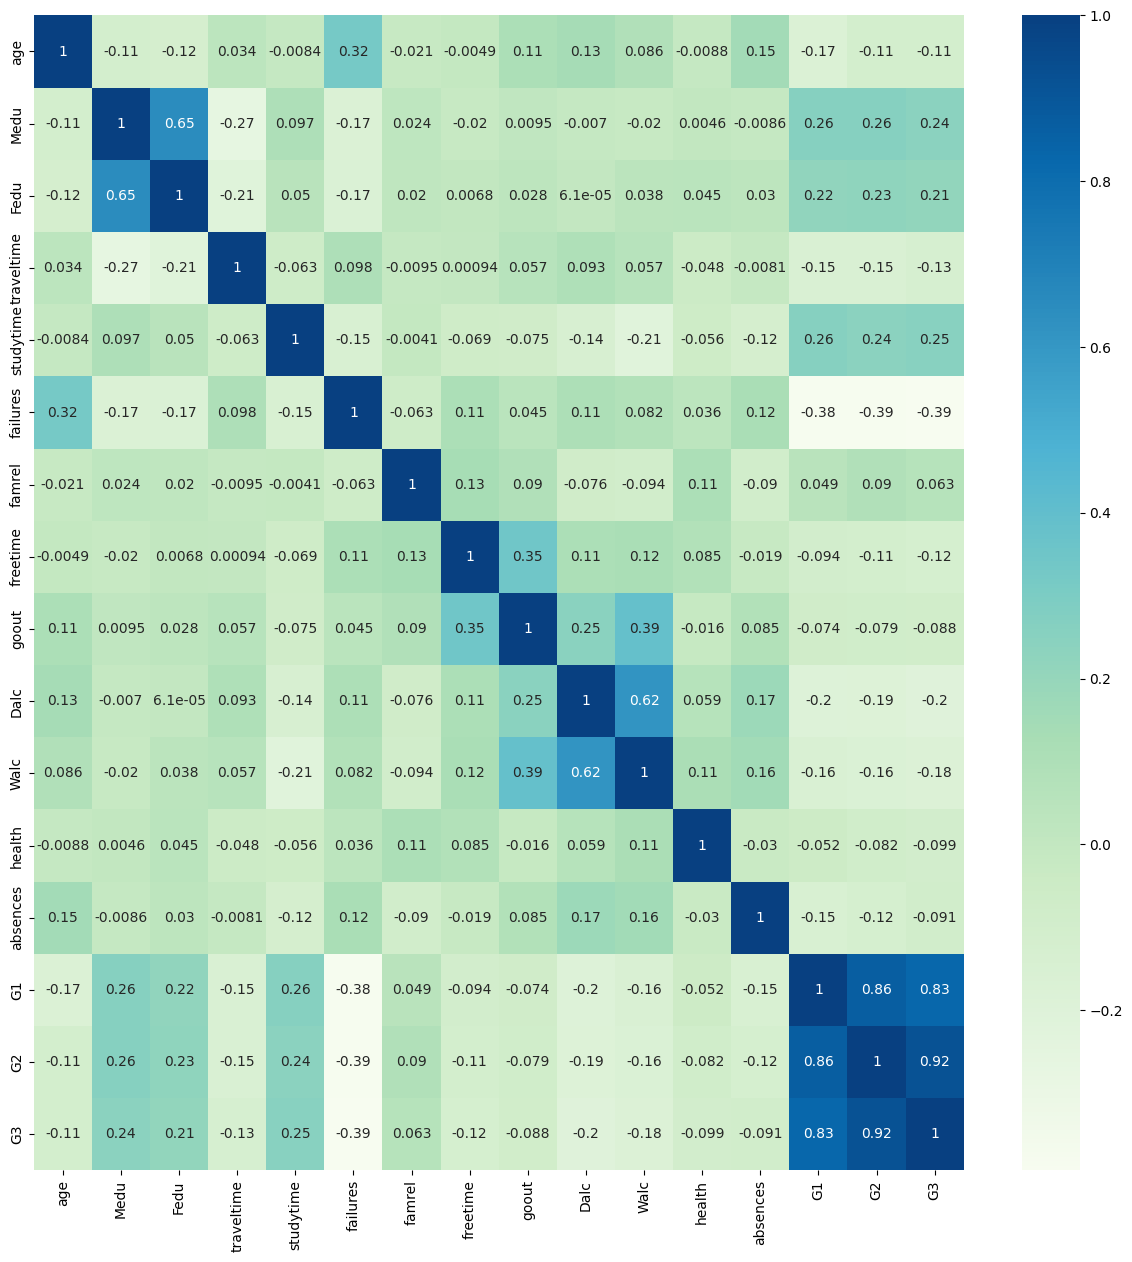

In [15]:
plot_utils.plot_heatmap(df_port, save_path='./plot/port_heatmap.png', show=True)

# Alcohol Effect on Academic Performance


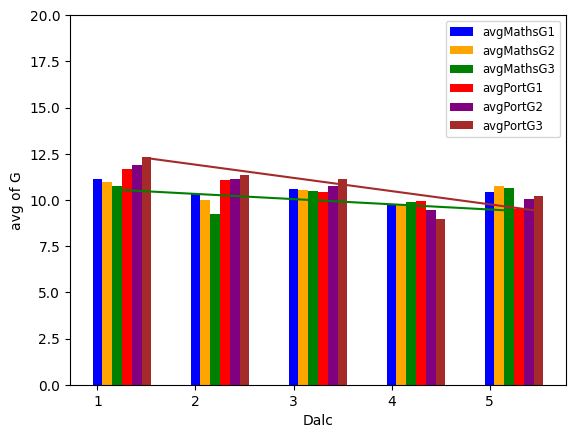

In [20]:
# X: Dalc, workday alchol consumption
# Y: average grade of G1 / G2 / G3
# With linear regression
plot_utils.plot_bar_Dalc_vs_G(df_maths, df_port)

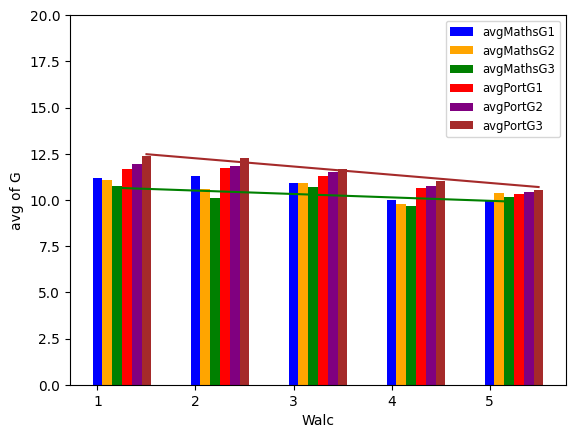

In [24]:
# X: Walc, weekend alcohol consumpotion
# Y: average grade of G1 / G2 / G3
# With linear regression
plot_utils.plot_bar_Walc_vs_G(df_maths, df_port)

# Academic Improvement

# Non-Alcohol Effect on Academic Performance

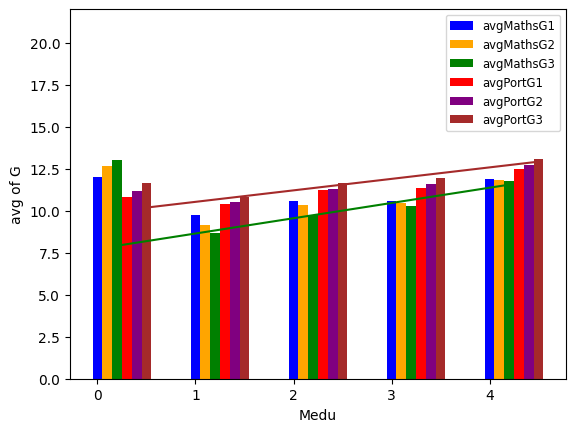

In [25]:
# X: Medu
# Y: average value of G1 / G2 / G3
plot_utils.plot_bar_Medu_vs_G(df_maths, df_port)

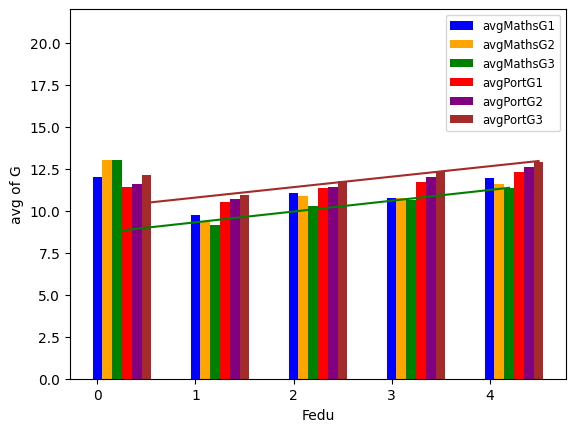

In [26]:
# X: Fedu
# Y: average value of G1 / G2 / G3
plot_utils.plot_bar_Fedu_vs_G(df_maths, df_port)

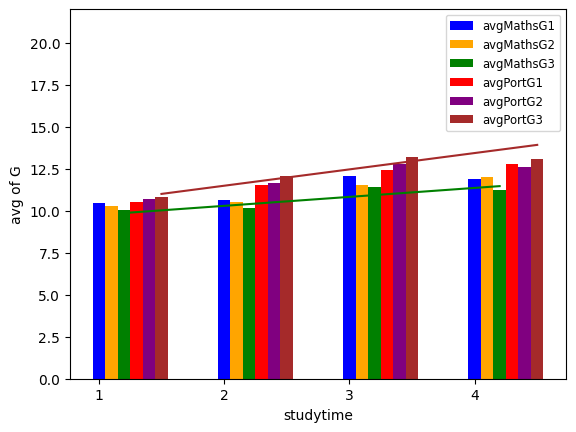

In [27]:
plot_utils.plot_bar_studytime_vs_G(df_maths, df_port)

# Modeling And Feature Importance


In [37]:
math = data_utils.read_csv('./data/Maths.csv')
portuguese = data_utils.read_csv('./data/Portuguese.csv')

In [ ]:
mysubject = math
my_subject_name = 'Math'

my_subject = model_utils.Ctgrs_to_nums(mysubject)
my_subject_x_train_t, my_subject_x_test, my_subject_y_train, my_subject_y_test, my_subject_x_train = \
        model_utils.train_data(my_subject)
model_my_subject = model_utils.lzy_clsfy_models( \
        my_subject_x_test, my_subject_y_train, my_subject_y_test, my_subject_x_train)

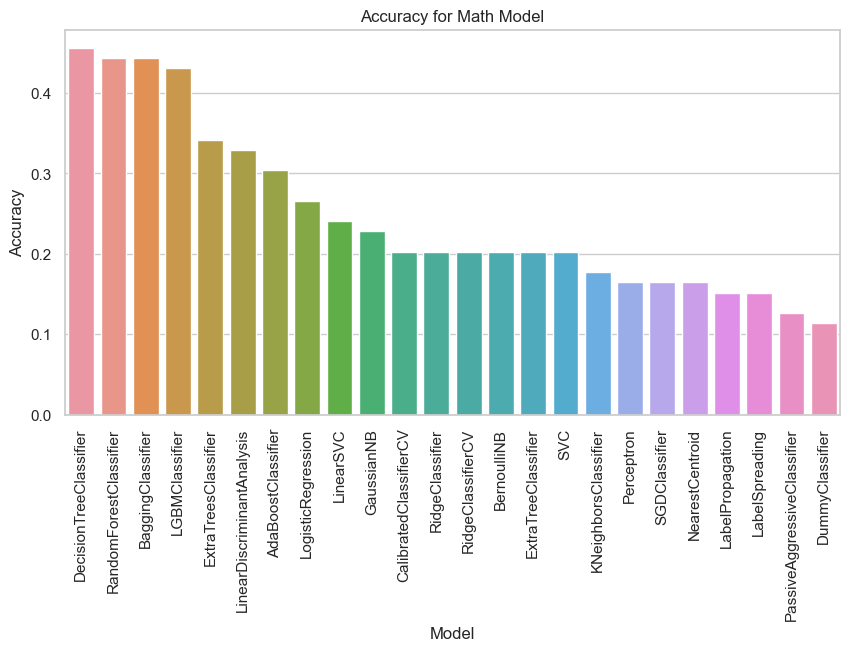

In [51]:
model_utils.plt_models(model_my_subject, my_subject_name)

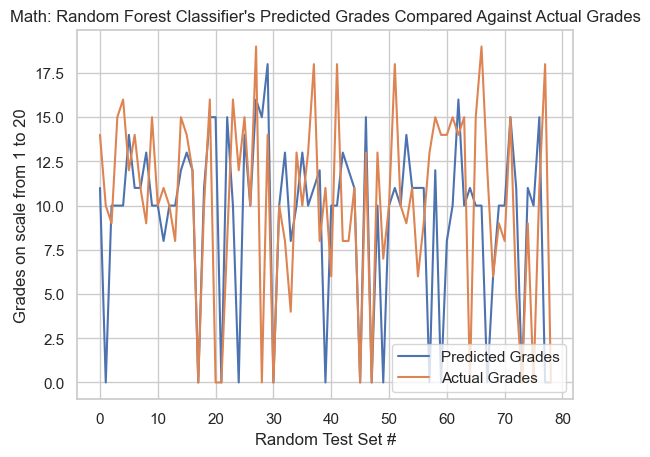

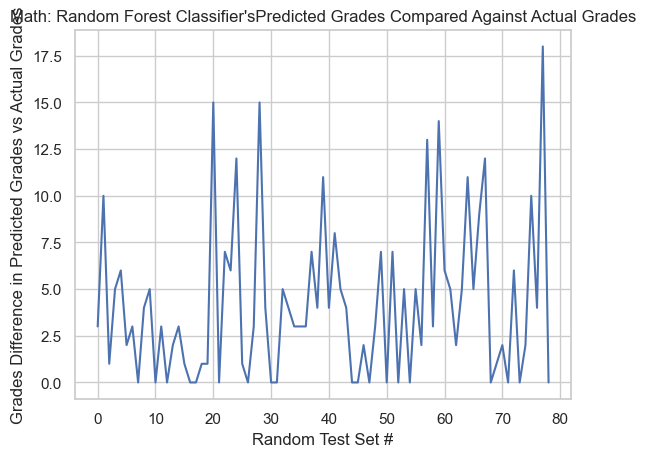

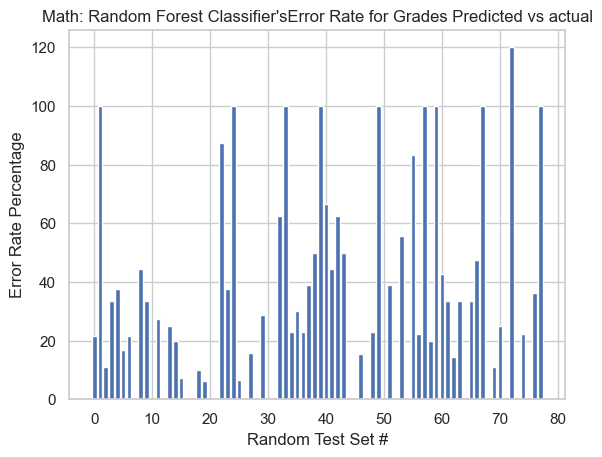

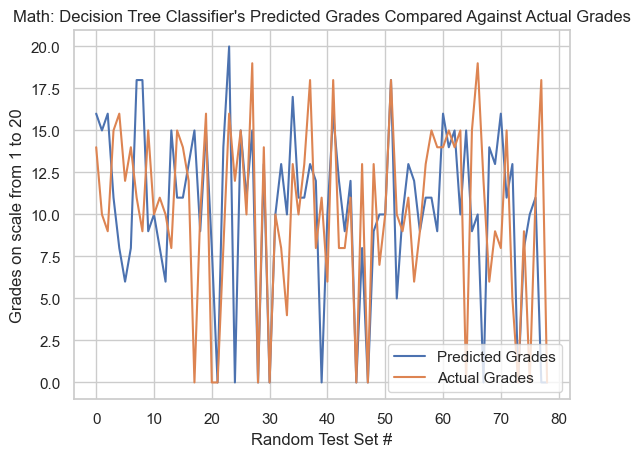

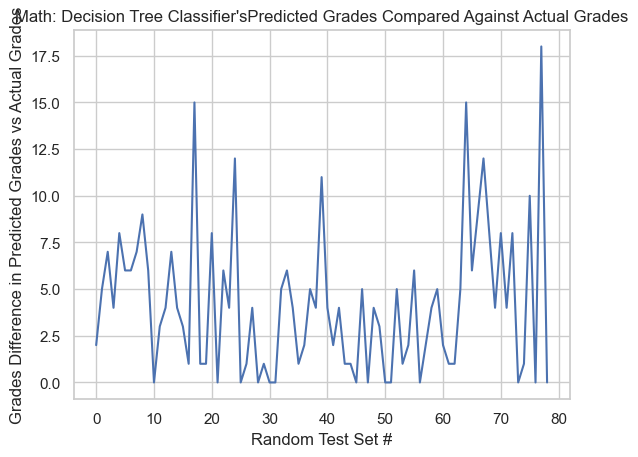

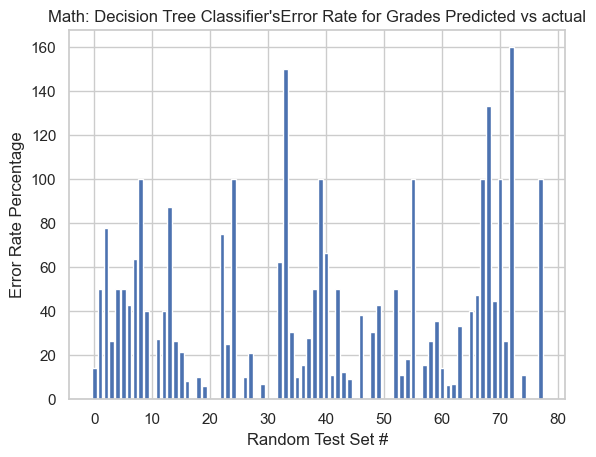

In [43]:
my_subject_x_train_t, my_subject_x_test, my_subject_y_train, my_subject_y_test, my_subject_x_train, my_subject_x, my_subject_y, = \
        model_utils.train_data_no_grades(my_subject)
num_of_models= 2
for inst in range(num_of_models):
    # modeling portion
    predictions, my_model_name = model_utils.predict_grades(my_subject_name, my_subject_x_test, my_subject_y_train,
                                                my_subject_y_test, my_subject_x_train, inst)
    model_utils.plot_pred_v_actual(predictions, my_subject_y_test, my_subject_name, my_model_name)
    model_utils.plot_pred_v_actual_diff(predictions, my_subject_y_test, my_subject_name, my_model_name)
    model_utils.plot_error_rate(predictions, my_subject_y_test, my_subject_name, my_model_name)

Feature importance by sklearn: {'school': 0.0, 'sex': 0.001, 'age': 0.023, 'address': 0.0, 'famsize': 0.001, 'Pstatus': 0.0, 'Medu': 0.0, 'Fedu': 0.002, 'Mjob': 0.023, 'Fjob': 0.001, 'reason': 0.003, 'guardian': 0.014, 'traveltime': 0.0, 'studytime': 0.001, 'failures': 0.001, 'schoolsup': 0.0, 'famsup': 0.0, 'paid': 0.0, 'activities': 0.017, 'nursery': 0.007, 'higher': 0.0, 'internet': 0.0, 'romantic': 0.001, 'famrel': 0.001, 'freetime': 0.001, 'goout': 0.001, 'Dalc': 0.001, 'Walc': 0.001, 'health': 0.001, 'absences': 0.13}


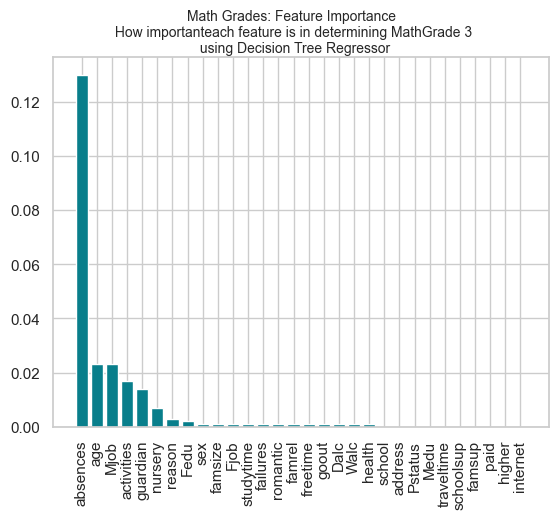

+-------------------------------------------------------+
|             The 5 most important feautures            |
+-------------------------------------------------------+
| ['absences', 'age', 'Mjob', 'activities', 'guardian'] |
+-------------------------------------------------------+
Weekend Alchohol consumption ranks #19 and determines 0.10 Percent of the overall grade
WeekDAY Alchohol consumption ranks #18 and determines 0.10 Percent of the overall grade
Feature importance by sklearn: {'school': 0.002, 'sex': 0.001, 'age': 0.013, 'address': 0.001, 'famsize': 0.001, 'Pstatus': 0.0, 'Medu': 0.004, 'Fedu': 0.003, 'Mjob': 0.004, 'Fjob': 0.004, 'reason': 0.006, 'guardian': 0.002, 'traveltime': 0.002, 'studytime': 0.003, 'failures': 0.005, 'schoolsup': 0.004, 'famsup': 0.001, 'paid': 0.002, 'activities': 0.008, 'nursery': 0.001, 'higher': 0.0, 'internet': 0.001, 'romantic': 0.003, 'famrel': 0.004, 'freetime': 0.005, 'goout': 0.003, 'Dalc': 0.002, 'Walc': 0.003, 'health': 0.006, 'absen

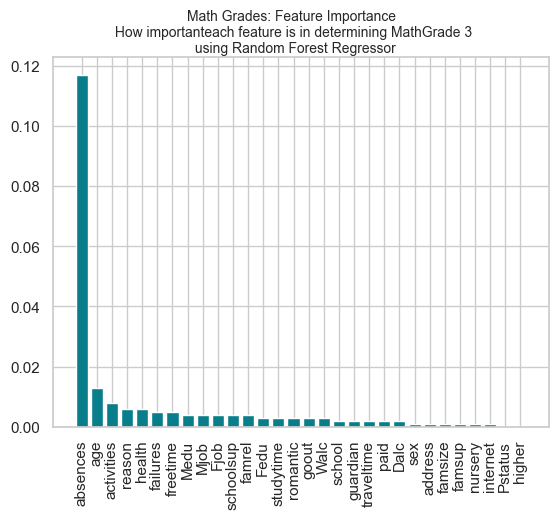

+-------------------------------------------------------+
|             The 5 most important feautures            |
+-------------------------------------------------------+
| ['absences', 'age', 'activities', 'reason', 'health'] |
+-------------------------------------------------------+
Weekend Alchohol consumption ranks #17 and determines 0.30 Percent of the overall grade
WeekDAY Alchohol consumption ranks #22 and determines 0.20 Percent of the overall grade


In [56]:
for inst in range(num_of_models): 
    tree, my_model_name = model_utils.determine_tree(inst)
    # model_utils.visualize_tree(my_subject_x_train, my_subject_y_train, inst)
    # feature importance portion
    names, values, sorted_feature_importance = model_utils.find_feature_imptnc(tree, my_subject_x, my_subject_x_train, my_subject_y_train)
    model_utils.plot_feature_imptnc(names, values, my_subject_name, my_model_name)
    model_utils.table_feature_imptnc(sorted_feature_importance, names)